In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

from sklearn.model_selection import train_test_split
from sklearn import decomposition as decomp
from sklearn import metrics
from sklearn.feature_selection import f_regression


from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
from statsmodels.regression import linear_model as lm
from statsmodels.multivariate import pca

%matplotlib inline

## Upload the data, split variables and response

In [90]:
from google.colab import files
upl = files.upload()

Saving WiscLottery.csv to WiscLottery (1).csv


In [91]:
df = pd.read_csv('WiscLottery.csv')
df.tail()

,ZIP,PERPERHH,MEDSCHYR,MEDHVL,PRCRENT,PRC55P,HHMEDAGE,MEDINC,SALES,POP
45,54745,2.5,12.3,49.6,13,52,55,33.7,480.6625,1752
46,54758,2.7,12.6,40.7,29,46,51,41.3,2724.9625,4347
47,54810,2.4,12.6,58.3,21,50,55,34.8,400.6000,1765
48,54839,2.7,12.6,39.2,12,43,51,35.4,189.0000,280
49,54956,2.7,13.0,71.7,27,31,45,60.3,16779.5750,34261


In [92]:
df.shape

(50, 10)

In [93]:
df.columns

Index(['ZIP', 'PERPERHH', 'MEDSCHYR', 'MEDHVL', 'PRCRENT', 'PRC55P',
       'HHMEDAGE', 'MEDINC', 'SALES', 'POP'],
      dtype='object')

In [94]:
y = df['SALES']
# normalize the data
# y = (y - y.mean()) / y.std()
y.head()

0     1285.4000
1     3571.4500
2     2407.0375
3     1223.8250
4    15046.4000
Name: SALES, dtype: float64

In [95]:
x = df[['PERPERHH',  'MEDSCHYR',
        'MEDHVL', 'PRCRENT',
        'PRC55P', 'HHMEDAGE',
        'MEDINC', 'POP']]
# normalize the data
# x = (x - x.mean()) / x.std()
x.head()

,PERPERHH,MEDSCHYR,MEDHVL,PRCRENT,PRC55P,HHMEDAGE,MEDINC,POP
0,3.0,12.6,71.3,21,38,48,54.2,435
1,3.2,12.9,98.0,6,28,46,70.7,4823
2,2.8,12.4,58.7,25,35,45,43.6,2469
3,3.1,12.5,65.7,24,29,45,51.9,2051
4,2.6,13.1,96.7,32,27,42,63.1,13337


In [0]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle=False)

In [97]:
xy = x_train.copy()
xy['SALES'] = y_train
xy.head()

,PERPERHH,MEDSCHYR,MEDHVL,PRCRENT,PRC55P,HHMEDAGE,MEDINC,POP,SALES
0,3.0,12.6,71.3,21,38,48,54.2,435,1285.4000
1,3.2,12.9,98.0,6,28,46,70.7,4823,3571.4500
2,2.8,12.4,58.7,25,35,45,43.6,2469,2407.0375
3,3.1,12.5,65.7,24,29,45,51.9,2051,1223.8250
4,2.6,13.1,96.7,32,27,42,63.1,13337,15046.4000


In [98]:
y_train.var()

68371390.30231729

## Variables selection

### Variables correlation analysis

In [0]:
# pairplot
def pairplot(df):
    plt.figure(figsize=(20,20))
    sns.pairplot(df)
    plt.show()
    

In [0]:
# corrplot
def corrplot(df):
    # Compute the correlation matrix
    corr = df.corr()
    # Generate a mask for the upper triangle
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    # plot
    plt.figure(figsize=(12,12))
    sns.heatmap(corr, mask=mask, annot=True, xticklabels=True, yticklabels=True)
    plt.show()

    # make annotation manually
    # print(*df.columns, sep='\n')
    

In [0]:
# multicollinearity test
def vif_test(x, xy, y_name):
    """
    vif > 5 => bad;
    multicollinearity exists
    """
    vif_df = pd.DataFrame()
    vif_df["VIF Factor"] = [vif(x.values, i) for i in range(x.shape[1])]
    vif_df["features"] = x.columns
    vif_df = vif_df.round(1)
    corr = xy.corr()
    corr = corr[y_name]
    corr = corr.round(3)
    del corr[y_name]
    vif_df[f'r({y_name}, X)'] = [corr[feature] for feature in vif_df['features']]
    return vif_df.sort_values(by=[f'r({y_name}, X)'])

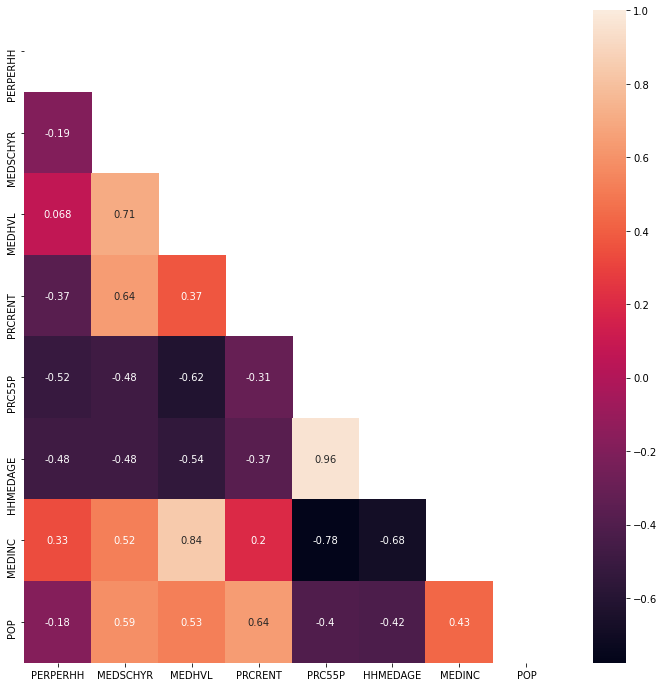

In [0]:
corrplot(x)

In [0]:
vif_test((x - x.mean())/x.std(), xy, 'SALES')

,VIF Factor,features,"r(SALES, X)"
0,2.7,PERPERHH,-0.263
4,24.8,PRC55P,-0.244
5,18.5,HHMEDAGE,-0.224
1,3.2,MEDSCHYR,0.382
6,6.6,MEDINC,0.382
3,2.9,PRCRENT,0.490
2,5.6,MEDHVL,0.534
7,2.1,POP,0.878


In [14]:
xx = x.copy()
xx = (xx - xx.mean())/xx.std()
del xx['PRC55P']
del xx['MEDINC']
vif_test(xx, xy, 'SALES')

,VIF Factor,features,"r(SALES, X)"
0,2.5,PERPERHH,-0.263
4,3.1,HHMEDAGE,-0.224
1,3.2,MEDSCHYR,0.382
3,2.8,PRCRENT,0.490
2,2.5,MEDHVL,0.534
5,2.1,POP,0.878


### Select variables

1. due to high VIF and low r we kill **PRC55P** and **MEDINC**

### OLS with selected variables







In [28]:
xx.head()

,PERPERHH,MEDSCHYR,MEDHVL,PRCRENT,HHMEDAGE,POP
0,1.404132,-0.174096,0.773304,-0.393897,-0.183435,-0.799776
1,2.359324,0.369953,2.226514,-1.999454,-0.666159,-0.404395
2,0.448940,-0.536795,0.087519,0.034252,-0.907521,-0.616502
3,1.881728,-0.355445,0.468511,-0.072785,-0.907521,-0.654166
4,-0.506252,0.732652,2.155759,0.783512,-1.631608,0.362759


In [0]:
x_new_train, x_new_test = train_test_split(xx, train_size=0.8, shuffle=False)

In [29]:
m2 = lm.OLS(endog=y_train, exog=x_new_train, hasconst=True).fit()
m2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  SALES   R-squared:                       0.212
Model:                            OLS   Adj. R-squared:                  0.096
Method:                 Least Squares   F-statistic:                     1.828
Date:                Mon, 30 Mar 2020   Prob (F-statistic):              0.134
Time:                        09:11:59   Log-Likelihood:                -412.30
No. Observations:                  40   AIC:                             836.6
Df Residuals:                      34   BIC:                             846.7
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
PERPERHH    -974.8528   2048.236     -0.476      0.637   -5137.369    3187.664
MEDSCHYR   -3419.4063   2325.939     -1.470      0.151   -8146.283    1307.471
MEDHVL      3526.3996   2017.846      1.748      0.090    -574.357    7627.157
PRCRENT    -1167.7798   2710.266     -0.431      0.669   -6675.703    4340.143
HHMEDAGE    -952.0222   2425.831     -0.392      0.697   -5881.904    3977.859
POP         7565.0431   1916.787      3.947      0.000    3669.664    1.15e+04
==============================================================================
Omnibus:                       11.113   Durbin-Watson:                   0.508
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               13.550
Skew:                           0.822   Prob(JB):                      0.00114
Kurtosis:                       5.330   Cond. No.                         5.43
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [0]:
mdl = sklearn.linear_model.LinearRegression(fit_intercept=True).fit(x_new_train, y_train)
y_hat = mdl.predict(x_new_test)

In [36]:
metrics.r2_score(y_test, y_hat)

0.7301396418476942

In [37]:
resid = y_test - y_hat
resid.name = ''
resid.var()

16154313.812979102

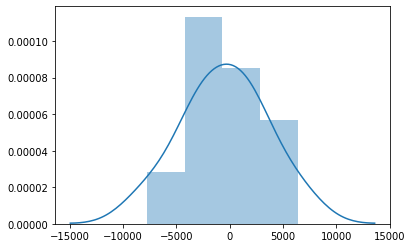

In [38]:
sns.distplot(resid)

In [0]:
xx_norm = (xx - xx.mean())/xx.std()
y_norm = (y-y.mean())/y.std()
xx1_train, xx1_test, y_norm_train, y_norm_test = train_test_split(xx_norm,y_norm, train_size=0.8, shuffle=False)
mdl2 = sklearn.linear_model.LinearRegression().fit(xx1_train, y_norm_train)

In [45]:
dff = pd.DataFrame()
dff['features'] = xx.columns
dff['coef'] = mdl.coef_
dff['normalized coef'] = mdl2.coef_
dff

,features,coef,normalized coef
0,PERPERHH,-939.943809,-0.115999
1,MEDSCHYR,-2653.819122,-0.327510
2,MEDHVL,2920.940485,0.360476
3,PRCRENT,-896.861939,-0.110683
4,HHMEDAGE,126.702799,0.015637
5,POP,7724.929080,0.953340


# OLS

Y = SALES

In [0]:
# model
model = lm.OLS(y_train, exog=x_train, hasconst=True)
res = model.fit()

In [112]:
res.summary(yname='SALES')

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  SALES   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     22.62
Date:                Mon, 30 Mar 2020   Prob (F-statistic):           1.05e-10
Time:                        12:47:21   Log-Likelihood:                -381.40
No. Observations:                  40   AIC:                             778.8
Df Residuals:                      32   BIC:                             792.3
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
PERPERHH     518.1475   3720.486      0.139      0.890   -7060.234    8096.530
MEDSCHYR   -2557.6464   1532.893     -1.669      0.105   -5680.047     564.755
MEDHVL       126.9907     75.316      1.686      0.102     -26.423     280.405
PRCRENT      -38.2644    135.524     -0.282      0.779    -314.319     237.790
PRC55P      -299.2607    424.048     -0.706      0.485   -1163.017     564.496
HHMEDAGE     785.7136    601.491      1.306      0.201    -439.483    2010.910
MEDINC       -32.3296    158.668     -0.204      0.840    -355.525     290.866
POP            0.6979      0.082      8.477      0.000       0.530       0.866
==============================================================================
Omnibus:                       23.116   Durbin-Watson:                   2.714
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               54.188
Skew:                           1.349   Prob(JB):                     1.71e-12
Kurtosis:                       8.023   Cond. No.                     9.06e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.06e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [0]:
# make a forecast
y_hat = res.predict(x_test)

In [114]:
# determination
metrics.r2_score(y_test, y_hat)

0.7778281846942892

In [115]:
metrics.explained_variance_score(y_test, y_hat)

0.8007485902856311

Text(0, 0.5, 'Actual')

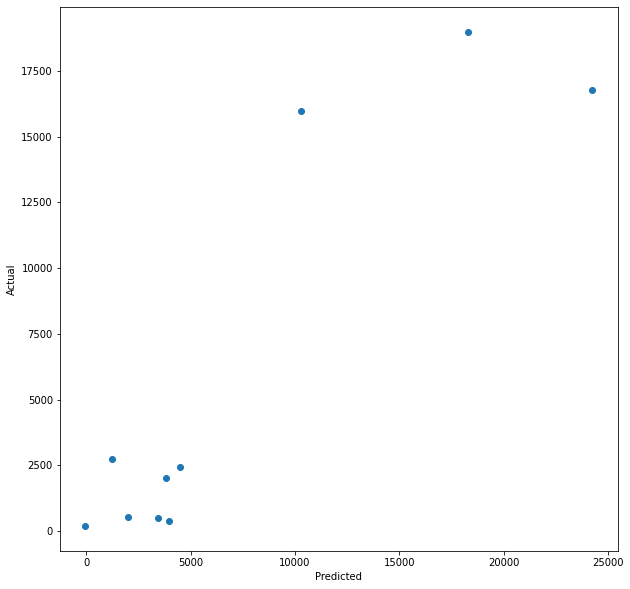

In [116]:
# predicted vs actual
fig, ax = plt.subplots(figsize=(10,10))
ax.plot(y_hat, y_test, 'o')
# ax.plot([0, 0], [20000, 20000], 'k', lw=4, color='orange')
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')

In [117]:
# residuals
resid = (y_test - y_hat)
resid.name = ''
resid.std()

3484.262609473212

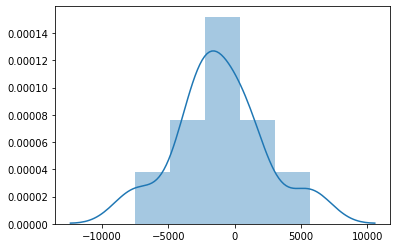

In [118]:
sns.distplot(resid)

In [119]:
# variance estimation of OLS
resid.var()

12140085.931773074

In [0]:
m2 = sklearn.linear_model.LinearRegression().fit(x_train, y_train)
y_hat2 = m2.predict(x_test)

In [121]:
resid2 = y_test-y_hat2
resid2.var()

15882277.172008932

In [122]:
metrics.r2_score(y_test, y_hat2)

0.7324943873870193

# Ridge regression


IndexError: ignored

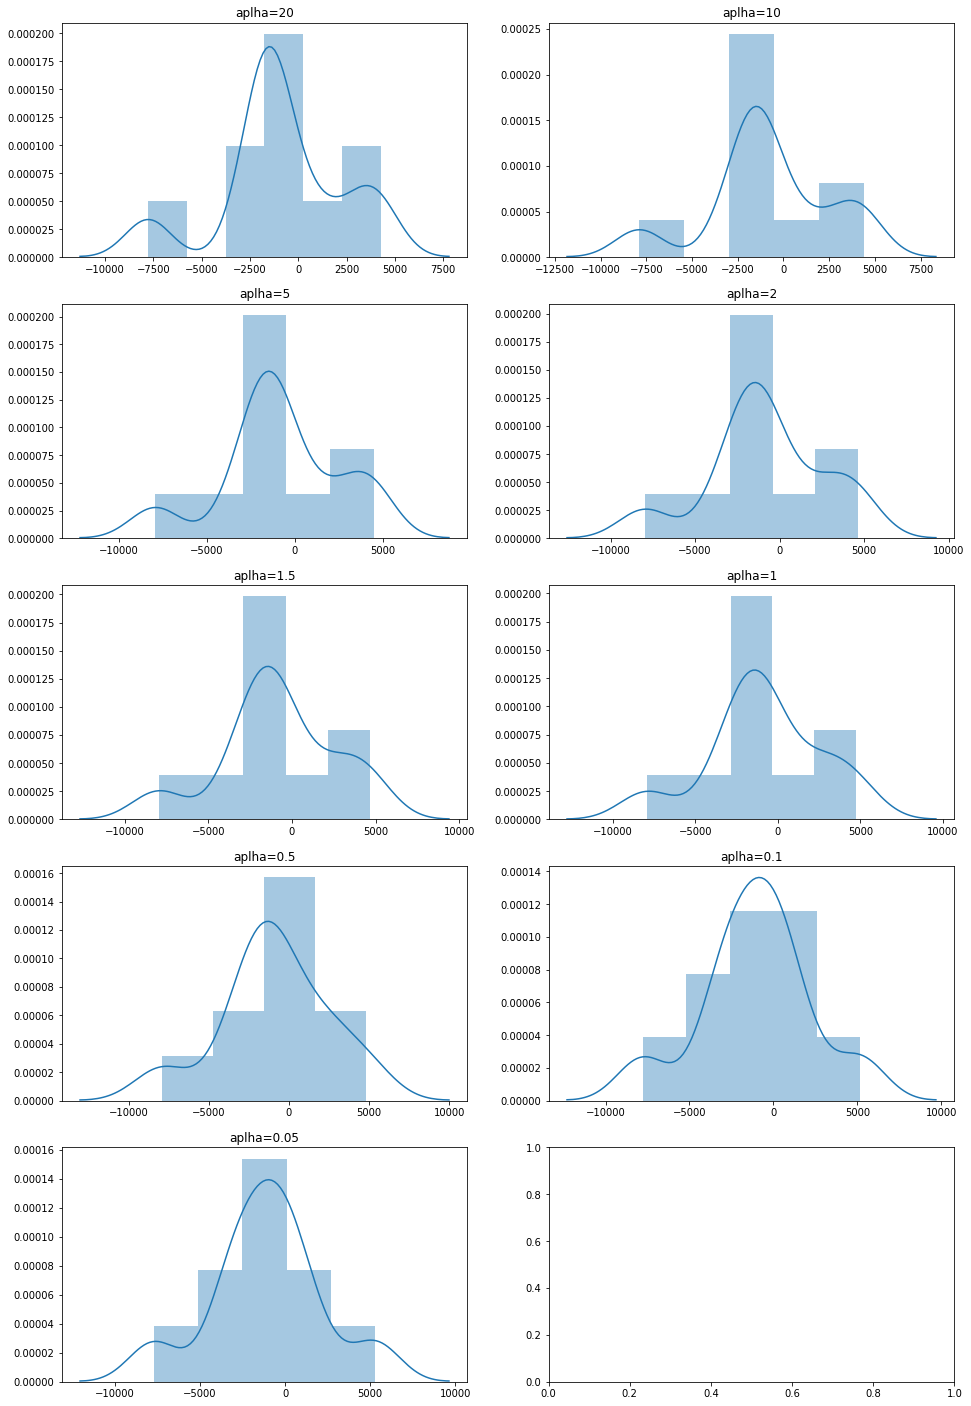

In [54]:
df2 = pd.DataFrame()
alphas = [20, 10, 5, 2, 1.5, 1, 0.5, 0.1, 0.05]
df2['alpha'] = alphas
r2s = []
var = []
n = len(df2['alpha'])
fig, axes = plt.subplots(nrows=n//2+1, ncols=2, figsize=(16, 5*(n//2 + 1)))
i = 0
for j in range(n//2+1):
    for k in range(2):
        alpha = alphas[i]
        mdl = model.fit_regularized(alpha=alpha, L1_wt=0)
        y_hat = mdl.predict(x_test)
        r2s.append(metrics.r2_score(
            y_test, 
            y_hat
            ))
        resid = y_test-y_hat
        var.append(resid.var())
        sns.distplot(resid, ax=axes[j,k])
        axes[j,k].set_title(f'aplha={alpha}')
        axes[j,k].set_xlabel('')
        i += 1
df2['r2'] = r2s
df2['var'] = var
# df2

In [0]:
df2

,alpha,r2,var
0,20.00,0.806863,1.095476e+07
1,10.00,0.792951,1.183824e+07
2,5.00,0.784095,1.238767e+07
3,2.00,0.779995,1.261717e+07
4,1.50,0.780237,1.258695e+07
5,1.00,0.781601,1.247264e+07
6,0.50,0.785807,1.213246e+07
7,0.10,0.790596,1.153349e+07
8,0.05,0.787614,1.160781e+07


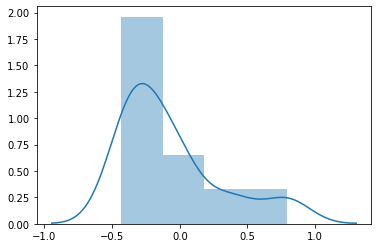

In [0]:
mdl = lm.Ridge(alpha=10, fit_intercept=False).fit(x_train, y_train)
y_hat = mdl.predict(x_test)
resid = y_test-y_hat
resid.name = ''
sns.distplot(resid)

# PCA

In [0]:
pc = pca.PCA(x, method='eig')

In [100]:
len(x.columns)

8

In [101]:
pc.eigenvals

0    218.192240
1     97.623548
2     35.521352
3     20.860823
4     12.451910
5      9.462604
6      4.697313
7      1.190210
Name: eigenvals, dtype: float64

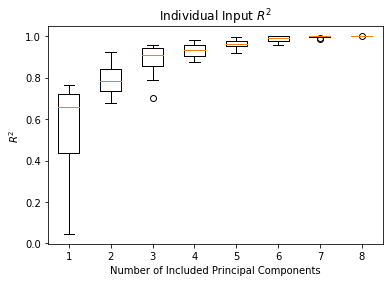

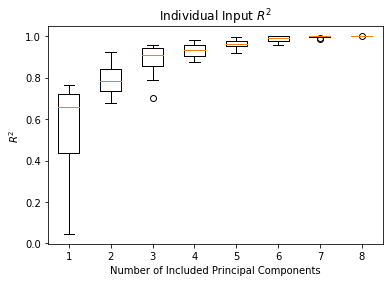

In [102]:
pc.plot_rsquare()

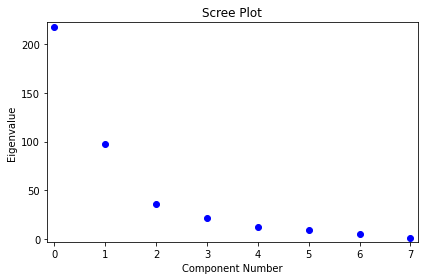

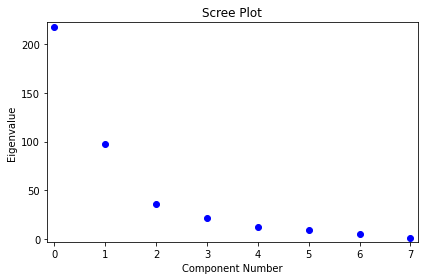

In [103]:
pc.plot_scree(log_scale=False)

In [0]:
x_new = pca.PCA(x, ncomp=3, method='eig').transformed_data

In [0]:
x_new_train, x_new_test = train_test_split(x_new, train_size=0.8, shuffle=False)

In [106]:
mdl = sklearn.linear_model.LinearRegression(fit_intercept=True).fit(x_new_train, y_train)
mdl.coef_

array([-1024.77354084, -2680.54663391,  3322.89039795,  -994.11114494,
       -1364.82416812,  1022.70719787,  -862.19125935,  7673.05455714])

In [0]:
y_hat = mdl.predict(x_new_test)

In [108]:
metrics.r2_score(y_test, y_hat)

0.7324943873872083

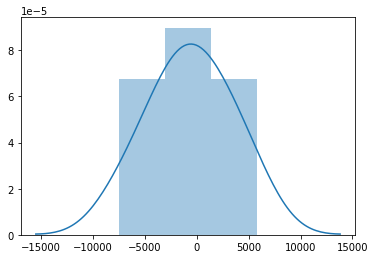

In [109]:
resid = y_test - y_hat
resid.name = ''
sns.distplot(resid)

In [110]:
resid.var()

15882277.172000004